# Investigación 1

## Pattern Recognition MP6122 - Master of Science in Electronics - Emphasis on Embedded Systems

## Costa Rica TEC

Professor: MSc. Felipe Meza
Student: Randy Céspedes Deliyore - carnet: 201054417

The choosen data set is named **Global Power Plant Database** and can be found [here](https://datasets.wri.org/dataset/globalpowerplantdatabase). This dataset is unprocessed and contains data of the power generation of 164 countries and 30 000 plants, in which its possible to found the power generation capacity by plant and by type of fuel (hydro, gas, coal, etc.). This dataset was found by investigating about energy-related datasets in **Kaggle** and it was found that some other datasets have been generated after pre-processing this one.

## Data Preporcessing

1. First step is to load the libraries:

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt

2. Load the dataset:

In [3]:
power_plant = pd.read_csv("global_power_plant_database.csv")

3. Check the first Lines:

In [4]:
power_plant.head()

,country,country_long,name,gppd_idnr,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,other_fuel2,...,url,geolocation_source,wepp_id,year_of_capacity_data,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,estimated_generation_gwh
0,AFG,Afghanistan,Kajaki Hydroelectric Power Plant Afghanistan,GEODB0040538,33.00,32.3220,65.1190,Hydro,NaN,NaN,...,http://globalenergyobservatory.org,GEODB,1009793,2017.0,NaN,NaN,NaN,NaN,NaN,NaN
1,AFG,Afghanistan,Mahipar Hydroelectric Power Plant Afghanistan,GEODB0040541,66.00,34.5560,69.4787,Hydro,NaN,NaN,...,http://globalenergyobservatory.org,GEODB,1009795,2017.0,NaN,NaN,NaN,NaN,NaN,NaN
2,AFG,Afghanistan,Naghlu Dam Hydroelectric Power Plant Afghanistan,GEODB0040534,100.00,34.6410,69.7170,Hydro,NaN,NaN,...,http://globalenergyobservatory.org,GEODB,1009797,2017.0,NaN,NaN,NaN,NaN,NaN,NaN
3,AFG,Afghanistan,Nangarhar (Darunta) Hydroelectric Power Plant ...,GEODB0040536,11.55,34.4847,70.3633,Hydro,NaN,NaN,...,http://globalenergyobservatory.org,GEODB,1009787,2017.0,NaN,NaN,NaN,NaN,NaN,NaN
4,AFG,Afghanistan,Northwest Kabul Power Plant Afghanistan,GEODB0040540,42.00,34.5638,69.1134,Gas,NaN,NaN,...,http://globalenergyobservatory.org,GEODB,NaN,2017.0,NaN,NaN,NaN,NaN,NaN,NaN


**Note:** This dataset has multiple columns that contain repeated data. For this we get all column names:

In [5]:
power_plant[:0]

,country,country_long,name,gppd_idnr,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,other_fuel2,...,url,geolocation_source,wepp_id,year_of_capacity_data,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,estimated_generation_gwh


For example, columns like **country** (Country code) and **country_long** contain the same information. The column name **gppd_idnr** contains the country code and the plant **id number**, which is easier to handle than the **name**. 

Out of the 24 columns only the following are going to be use: 

+country
+gppd_idnr
+capacity_mw
+primary_fuel
+generation_gwh_2013
+generation_gwh_2014
+generation_gwh_2015
+generation_gwh_2016
+generation_gwh_2017



In [53]:
simplified_pp = power_plant.drop(columns=['country_long','name','other_fuel1','other_fuel2','other_fuel3','commissioning_year','owner','source','url','geolocation_source','wepp_id','year_of_capacity_data','latitude','longitude'])

In [54]:
simplified_pp.head()

,country,gppd_idnr,capacity_mw,primary_fuel,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,estimated_generation_gwh
0,AFG,GEODB0040538,33.00,Hydro,NaN,NaN,NaN,NaN,NaN,NaN
1,AFG,GEODB0040541,66.00,Hydro,NaN,NaN,NaN,NaN,NaN,NaN
2,AFG,GEODB0040534,100.00,Hydro,NaN,NaN,NaN,NaN,NaN,NaN
3,AFG,GEODB0040536,11.55,Hydro,NaN,NaN,NaN,NaN,NaN,NaN
4,AFG,GEODB0040540,42.00,Gas,NaN,NaN,NaN,NaN,NaN,NaN


**Number of plants per primary fuel type**

The first analysis to be done is to estimate the number of plants for each primary fuel type.

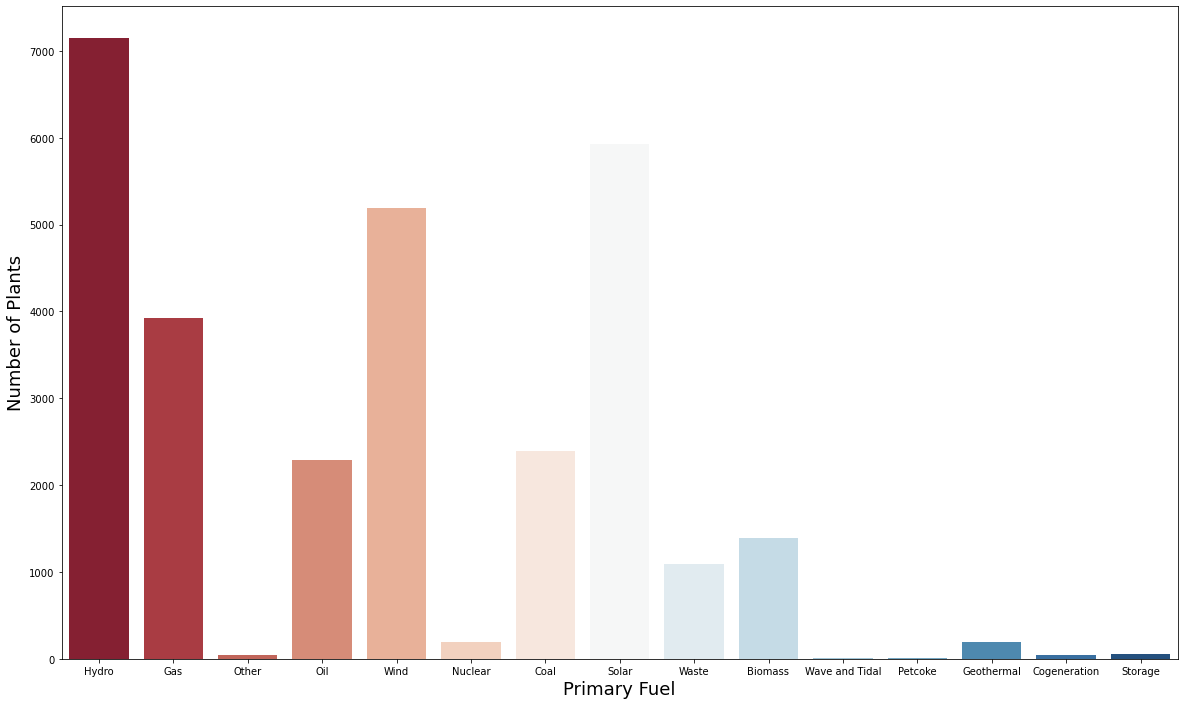

In [55]:
plt.figure(figsize=(20,12))
sns.countplot(x='primary_fuel',data=simplified_pp,palette='RdBu')
plt.xlabel("Primary Fuel",fontsize=18)
plt.ylabel("Number of Plants",fontsize=18)
plt.show()

In the figure above it can be see that the vast majority of plants worldwide are Hydroelectric.

In the next plot its possible to see the distrution of each plant by its type and generation capacity in MW. For example, its possible to see how several plants have values that separete a lot from the rest.

<Figure size 432x288 with 0 Axes>

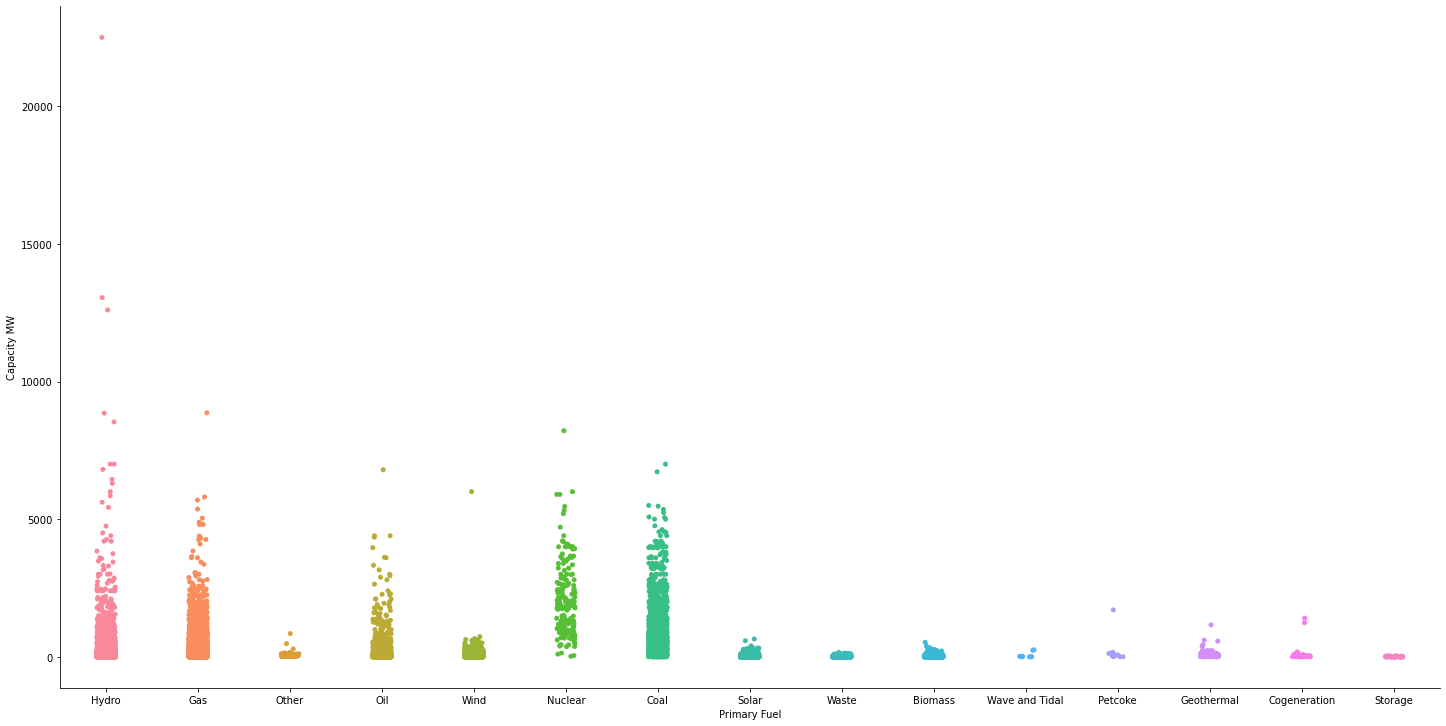

In [114]:
plt.figure()
g=sns.catplot(x='primary_fuel',y='capacity_mw',data=simplified_pp,ci=None,aspect=2,height=10)
(g.set_axis_labels('Primary Fuel', 'Capacity MW'))
plt.show()

From the plot above its possible to identify several outliers out of the scatter plots. We can evaluate each dataset idependently to eliminate them.

In [57]:
hydro_pp = simplified_pp.loc[simplified_pp['primary_fuel'] == 'Hydro']
gas_pp = simplified_pp.loc[simplified_pp['primary_fuel'] == 'Gas']
oil_pp = simplified_pp.loc[simplified_pp['primary_fuel'] == 'Oil']
wind_pp = simplified_pp.loc[simplified_pp['primary_fuel'] == 'Wind']
nuclear_pp = simplified_pp.loc[simplified_pp['primary_fuel'] == 'Nuclear']
coal_pp = simplified_pp.loc[simplified_pp['primary_fuel'] == 'Coal']

In [115]:
hydro_pp.describe()

,capacity_mw,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,estimated_generation_gwh
count,7155.000000,1622.000000,1625.000000,1709.000000,1853.000000,1659.000000,5438.000000
mean,146.804321,314.672623,256.312439,260.327471,254.284531,258.076518,649.839148
std,549.433962,1676.561830,980.130498,1052.683897,930.194372,980.094766,2548.580862
min,1.000000,-947.600000,-989.619000,-864.428000,-768.620000,-934.944000,0.967611
25%,5.300000,8.299000,7.742000,7.670000,9.494000,9.445500,26.057324
50%,20.000000,33.196500,29.115000,31.797000,38.554000,36.078700,86.793675
75%,93.000000,170.286725,147.255000,158.901500,166.015750,158.727375,408.504385
max,22500.000000,50834.000000,20261.569000,22300.000000,19011.492000,20983.990000,92452.570325


<Figure size 432x288 with 0 Axes>

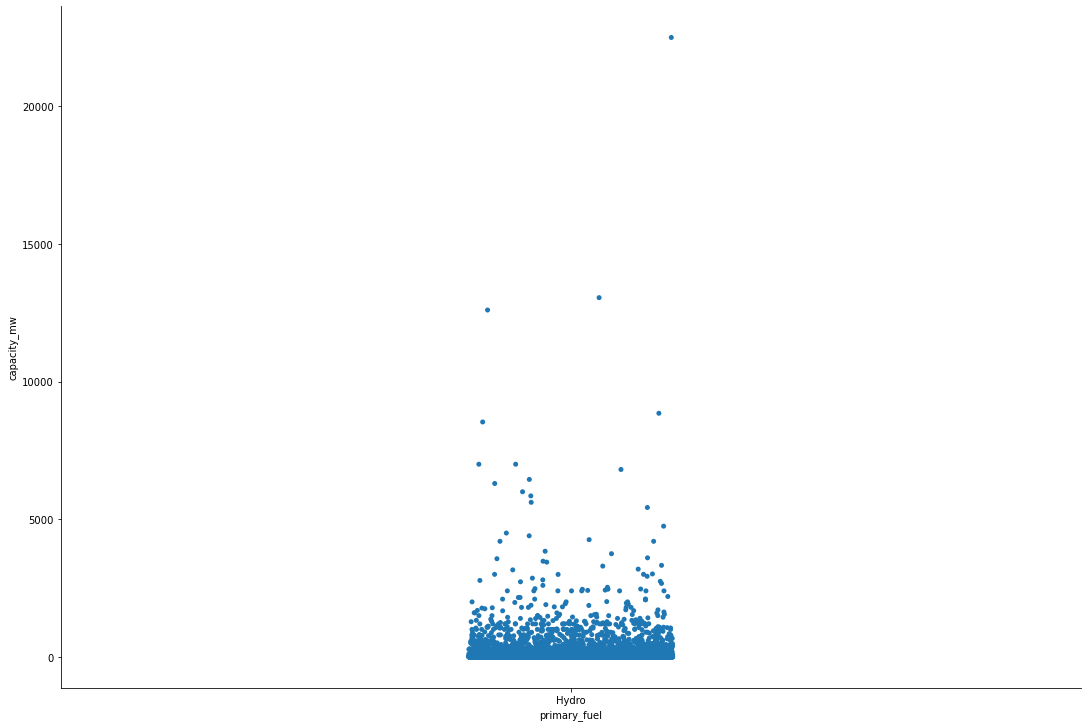

In [111]:
plt.figure()
hydro_pp_catplot=sns.catplot(x='primary_fuel',y='capacity_mw',data=hydro_pp,ci=None,aspect=1.5,height=10)
(g.set_axis_labels('Primary Fuel', 'Capacity MW'))
plt.show()

By doing the Normal Distribution plot of the data its possible to see how there is an issue on how the data is distributed.

<Figure size 432x288 with 0 Axes>

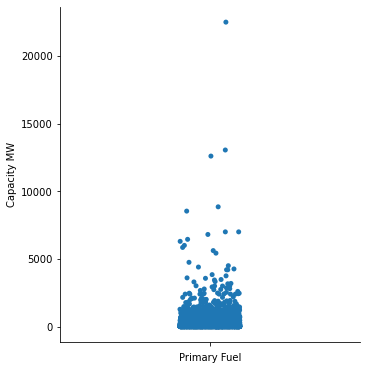

In [95]:
plt.figure()
g=sns.catplot(y='capacity_mw',data=hydro_pp,ci=None,aspect=1,height=5)
(g.set_axis_labels('Primary Fuel', 'Capacity MW'))
plt.show()

<AxesSubplot:xlabel='capacity_mw', ylabel='capacity_mw'>

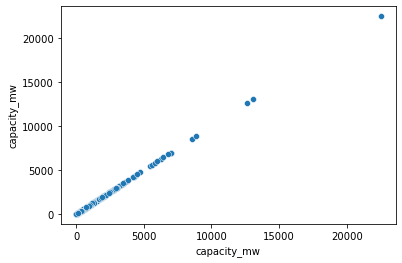